### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = 'C:/Users/kskua/Documents/JupyterNotebooks/INeuron FULL STACK DS notebooks/datasets/Mall_Customers.csv'
df = pd.read_csv(path)

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Customer Segmentation

In [5]:
# Dropping label - we dont need it for sup ml
X = df.iloc[:, 3:]

In [6]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### KMeans Clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
# Finding value of k
wcss = []
for i in range(1,15):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=30)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

C:\Users\kskua\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'Number of clusters')

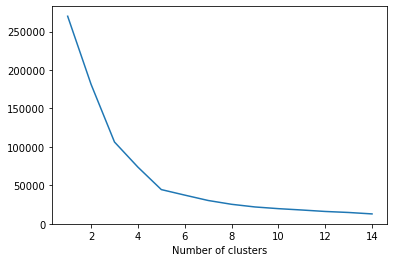

In [9]:
# Plotting elbow plot
plt.plot(range(1,15), wcss)
plt.xlabel('Number of clusters')

From elbow plot we see the the best number of clusters is between 4 and 6. 

In [10]:
# Training model
kmean1 = KMeans(n_clusters=5, init='k-means++', random_state=30)
kmean1.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [11]:
# Creating new columns with predictions
X['Clusters'] = kmean1.fit_predict(X)

In [12]:
X

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [13]:
# Selecting customers from only 0 cluster
X[X['Clusters'] == 0]

,Annual Income (k$),Spending Score (1-100),Clusters
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0
11,19,99,0
13,20,77,0
15,20,79,0
17,21,66,0
19,23,98,0


In [14]:
# Predicting from input
kmean1.predict([[55,31]])

array([1])

We can combine the clustering with supervised ml. In this way we can generate more robust and stable model and more accurate predictions. If the accuracy of the predictions are low with sup ml, we can try to group the data with unsup ml. Then the grouped data we can feed again to the sup ml model. 

### Clustering with MiniBatchKMeans

In [15]:
from sklearn.cluster import MiniBatchKMeans
minibatch = MiniBatchKMeans(n_clusters=5)
minibatch.fit(X)

C:\Users\kskua\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [16]:
minibatch.predict([[55,31 ,4]])

array([1])

### Clustering with dbscan

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=3)

In [22]:
len(set(dbscan.labels_))

12

In [23]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  2,  1, -1, -1,  2,  3,  2,  3,  2,  2,
        3,  2, -1, -1, -1, -1,  4,  5,  5,  4,  5,  4,  5,  5,  4,  4,  5,
        4, -1, -1, -1, -1, -1,  6,  7,  6,  6,  7,  7,  7,  6,  7,  6,  7,
       -1,  7,  7,  6,  7,  7,  6,  7,  7,  7,  6,  7,  7,  7,  6, -1,  6,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8, -1,
        8, -1, -1, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1,  9, -1,  9, -1,
       -1, -1,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       10, -1, -1, -1, 10, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [24]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

If there are -1 values in the labels_ from DBSCAN, it is a data point which is not a part of any cluster (outlier). 
We can experiment with different eps and min_samples values to achieve the best results. 

To evaluate DBSCAN we:

In [25]:
from sklearn import metrics

In [ ]:
# Adjusted rand score calculation - provide true labels and predicted labels (true labels are given by an expert)
# Here we will provide as a true labels, the labels we have from kmeans prediction (we don't have true labels)
X['Cluster DB'] = dbscan.labels_
true_label = X['Clusters']
predicted_label = X['Cluster DB']
metrics.adjusted_rand_score()

https://colab.research.google.com/drive/1zcL6QqITmH-zTEWyvjK-pdG8eN3GWE5g#scrollTo=oa1acHXSk4om - for further use